In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

Laboratory work 1

Reading database

In [2]:
df = pd.read_csv('global.csv', encoding='ISO-8859-1')
row_count = df.shape[0]
column_count = df.shape[1]

C:\Users\Admin\AppData\Local\Temp\ipykernel_3892\4067751759.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global.csv', encoding='ISO-8859-1')


Shape of the database

In [3]:
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')
df.head()

The DataFrame has 181691 rows.
The DataFrame has 135 columns.


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


1. Preprocessing

a. Visualisation

Filling in empty elements

In [4]:
df["target1"] = df["target1"].fillna("Unknown (auto)")

Terrorist acts related to the military

In [5]:
df.loc[df['target1'].str.contains("Soldier|Military|soldier|military")][["iyear","nkill","imonth", "country_txt", "target1"]]

,iyear,nkill,imonth,country_txt,target1
16,1970,1.0,1,Ethiopia,Soldier
160,1970,0.0,3,United States,"Military courthouse, Fort Benning Georgia"
289,1970,0.0,5,Uruguay,"Residence, Sgt. Selby Stevens, US Military Mis..."
328,1970,0.0,6,Jordan,Military Attache
575,1970,0.0,10,Turkey,U.S. Military Annex Exchange
...,...,...,...,...,...
181571,2017,0.0,12,Mali,Soldiers
181601,2017,3.0,12,Mali,Soldiers
181622,2017,1.0,12,Egypt,Battalion 103 Soldiers
181640,2017,NaN,12,Iraq,Soldiers


Removal of terrorist acts related to the military

In [6]:
#df = df[~df.index.isin(df.loc[df['target1'].str.contains("Soldier|Military|soldier|military")].index)]
df = df[df["target1"].str.contains("Soldier|Military|soldier|military") == False]
df.sort_values (by = ['nkill'], ascending = [False ])[["iyear","nkill","imonth", "country_txt", "target1"]].head()

,iyear,nkill,imonth,country_txt,target1
73126,2001,1384.0,9,United States,Passengers and crew members on American Airlin...
73127,2001,1383.0,9,United States,Passengers and crew members on United Airlines...
55934,1994,1180.0,4,Rwanda,Group of Tutsi Refugees inside Catholic Church
136283,2014,953.0,8,Iraq,Yizidi Civilians
133225,2014,670.0,6,Iraq,Badush Prison


Number of terrorist acts by year

array([[<Axes: title={'center': 'iyear'}>]], dtype=object)

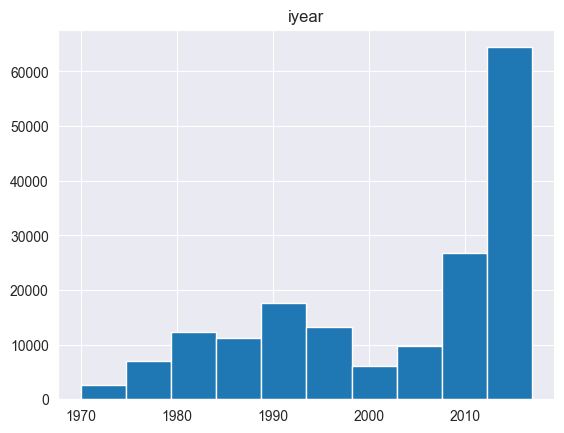

In [7]:
df.hist(column="iyear")

Years during which certain terrorist acts were more common

<Axes: title={'center': 'iyear'}, xlabel='attacktype1_txt'>

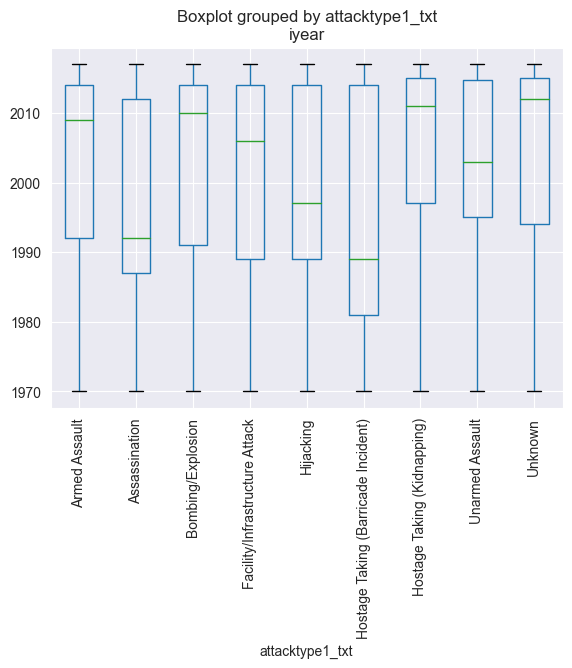

In [8]:
df.boxplot(column=["iyear"], by="attacktype1_txt", rot = 90)

The relationship between the year of the terrorist act and the number of victims

<Axes: xlabel='nwound', ylabel='nkill'>

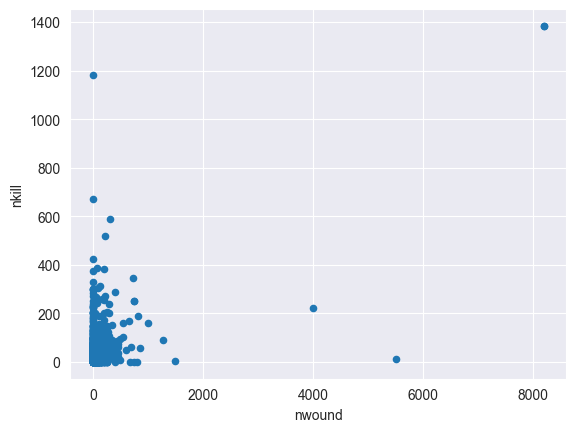

In [9]:
df.plot.scatter(y="nkill",x="nwound")

Acts with the largest number of victims

In [10]:
df.sort_values (by = ['nkill'], ascending = [False ])[["iyear","nkill","imonth", "country_txt", "target1", "nwound"]].head()

,iyear,nkill,imonth,country_txt,target1,nwound
73126,2001,1384.0,9,United States,Passengers and crew members on American Airlin...,8190.0
73127,2001,1383.0,9,United States,Passengers and crew members on United Airlines...,8191.0
55934,1994,1180.0,4,Rwanda,Group of Tutsi Refugees inside Catholic Church,0.0
136283,2014,953.0,8,Iraq,Yizidi Civilians,NaN
133225,2014,670.0,6,Iraq,Badush Prison,0.0


b. Cleaning data

Removal spaces in dataset

In [11]:
df = df.dropna(axis=1, thresh=100000)
df = df.dropna(axis=0, thresh=40)
df = df.drop_duplicates()
row_count = df.shape[0]
column_count = df.shape[1]

In [12]:
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')
df

The DataFrame has 171360 rows.
The DataFrame has 58 columns.


,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,0.0,0.0,-9,0.0,"""Somalia: Al-Shabaab Militants Attack Army Che...",START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,0.0,0.0,1,0.0,"""Putin's 'victory' in Syria has turned into a ...",START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,0.0,0.0,1,0.0,"""Maguindanao clashes trap tribe members,"" Phil...",START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,0.0,0.0,-9,0.0,"""Trader escapes grenade attack in Imphal,"" Bus...",START Primary Collection,-9,-9,0,-9


All terrorist acts that happened at 11/09/2001

In [13]:
df.loc[(df['imonth'] == 9) & (df['iday'] == 11) & (df['iyear'] == 2001)]

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
73123,200109110001,2001,9,11,0,34,Burundi,11,Sub-Saharan Africa,Mwaro,...,0.0,0.0,0,0.0,"""Burundi: Rebels Ambush Minibus North of Bujum...",CETIS,-9,-9,0,-9
73124,200109110002,2001,9,11,0,229,Democratic Republic of the Congo,11,Sub-Saharan Africa,North Kivu,...,0.0,0.0,0,0.0,"""DRCongo: Four Killed in Shooting in Rebel Hel...",CETIS,-9,-9,0,-9
73125,200109110003,2001,9,11,0,97,Israel,10,Middle East & North Africa,Haifa,...,0.0,0.0,0,0.0,"""Two Border Policemen Killed, One Wounded in a...",CETIS,-9,-9,0,-9
73126,200109110004,2001,9,11,0,217,United States,1,North America,New York,...,NaN,0.0,1,1.0,"United States Government, The 9/11 Commission ...",CETIS,0,1,0,1
73127,200109110005,2001,9,11,0,217,United States,1,North America,New York,...,NaN,0.0,1,1.0,"United States Government, The 9/11 Commission ...",CETIS,0,1,0,1
73128,200109110006,2001,9,11,0,217,United States,1,North America,Virginia,...,NaN,0.0,1,1.0,"United States Government, The 9/11 Commission ...",CETIS,0,1,0,1
73129,200109110007,2001,9,11,0,217,United States,1,North America,Pennsylvania,...,6.0,0.0,1,1.0,"United States Government, The 9/11 Commission ...",CETIS,0,1,0,1
73130,200109110008,2001,9,11,0,12,Armenia,7,Central Asia,Yerevan,...,0.0,0.0,-9,0.0,"""Armenia killing,"" Associated Press, September...",UMD Schmid 2012,-9,-9,0,-9


Removal columns that contain not numbers

In [14]:
df = df.select_dtypes(include='number')
df = df.fillna(0)
df = df[["iyear", "extended", "region", "nkill", "nwound", "attacktype1", "nperps"]]
df = df.loc[df['nperps'] < 1000]
df = df.replace([-99], 1)
df_without_onehot = df
df

,iyear,extended,region,nkill,nwound,attacktype1,nperps
0,1970,0,2,1.0,0.0,1,0.0
1,1970,0,1,0.0,0.0,6,7.0
2,1970,0,5,1.0,0.0,1,0.0
3,1970,0,8,0.0,0.0,3,0.0
4,1970,0,4,0.0,0.0,7,0.0
...,...,...,...,...,...,...,...
181686,2017,0,11,1.0,2.0,2,1.0
181687,2017,0,10,2.0,7.0,3,1.0
181688,2017,0,5,0.0,0.0,7,1.0
181689,2017,0,6,0.0,0.0,3,1.0


In [15]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder. fit_transform(df[['region']]). toarray ())
encoder_df.columns = [ "North America", "Central America & Caribbean", "South America", "Southeast Asia", "East Asia", "South Asia", "Central Asia", "Western Europe",  "Eastern Europe",  "Middle East & North Africa",  "Sub-Saharan Africa",  "Australasia & Oceania"]
final_df = df.join(encoder_df)
final_df.head()

,iyear,extended,region,nkill,nwound,attacktype1,nperps,North America,Central America & Caribbean,South America,Southeast Asia,East Asia,South Asia,Central Asia,Western Europe,Eastern Europe,Middle East & North Africa,Sub-Saharan Africa,Australasia & Oceania
0,1970,0,2,1.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970,0,1,0.0,0.0,6,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1970,0,5,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970,0,8,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1970,0,4,0.0,0.0,7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
final_df.drop('region', axis= 1 , inplace= True )

df = final_df
df.head()

,iyear,extended,nkill,nwound,attacktype1,nperps,North America,Central America & Caribbean,South America,Southeast Asia,East Asia,South Asia,Central Asia,Western Europe,Eastern Europe,Middle East & North Africa,Sub-Saharan Africa,Australasia & Oceania
0,1970,0,1.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970,0,0.0,0.0,6,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1970,0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970,0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1970,0,0.0,0.0,7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder. fit_transform(df[['attacktype1']]). toarray ())
encoder_df.columns = [ "Assassination", "Armed Assault", "Bombing/Explosion", "Hijacking", "Hostage Taking (Barricade Incident)", "Hostage Taking (Kidnapping)", "Facility/Infrastructure Attack", "Unarmed Assault",  "Unknown"]
final_df = df.join(encoder_df)
final_df.head()

,iyear,extended,nkill,nwound,attacktype1,nperps,North America,Central America & Caribbean,South America,Southeast Asia,...,Australasia & Oceania,Assassination,Armed Assault,Bombing/Explosion,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Facility/Infrastructure Attack,Unarmed Assault,Unknown
0,1970,0,1.0,0.0,1,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970,0,0.0,0.0,6,7.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1970,0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970,0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1970,0,0.0,0.0,7,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
final_df.drop('attacktype1', axis= 1 , inplace= True )

df = final_df
df = df.fillna(0)
df.head()

,iyear,extended,nkill,nwound,nperps,North America,Central America & Caribbean,South America,Southeast Asia,East Asia,...,Australasia & Oceania,Assassination,Armed Assault,Bombing/Explosion,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Facility/Infrastructure Attack,Unarmed Assault,Unknown
0,1970,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970,0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1970,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1970,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Normalization by median

In [19]:
df = df.fillna(0)
#scaler = StandardScaler()
#scaler.fit(df.drop("nkill", axis=1))
#scaled_data = pd.DataFrame(scaler.transform(df.drop("nkill", axis=1)))
#df = (df-df.median ())/df.std()
df.to_csv(r'D:\Programming\Python\MLLab01\global_preprocessed_without_norm.csv', index= False )
df.head()
#scaled_data
df["iyear"] = (df["iyear"]-df["iyear"].median())/df["iyear"].std()
df["nkill"] = (df["nkill"]-df["nkill"].median())/df["nkill"].std()
df["nwound"] = (df["nwound"]-df["nwound"].median())/df["nwound"].std()
df["nperps"] = (df["nperps"]-df["nperps"].median())/df["nperps"].std()
df

,iyear,extended,nkill,nwound,nperps,North America,Central America & Caribbean,South America,Southeast Asia,East Asia,...,Australasia & Oceania,Assassination,Armed Assault,Bombing/Explosion,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Facility/Infrastructure Attack,Unarmed Assault,Unknown
0,-2.952239,0,0.095379,0.000000,-0.048337,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.952239,0,0.000000,0.000000,0.290024,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-2.952239,0,0.095379,0.000000,-0.048337,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.952239,0,0.000000,0.000000,-0.048337,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.952239,0,0.000000,0.000000,-0.048337,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,0.605588,0,0.095379,0.056697,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181687,0.605588,0,0.190758,0.198440,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181688,0.605588,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181689,0.605588,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


c. Correlations

Correlation matrix

<Axes: >

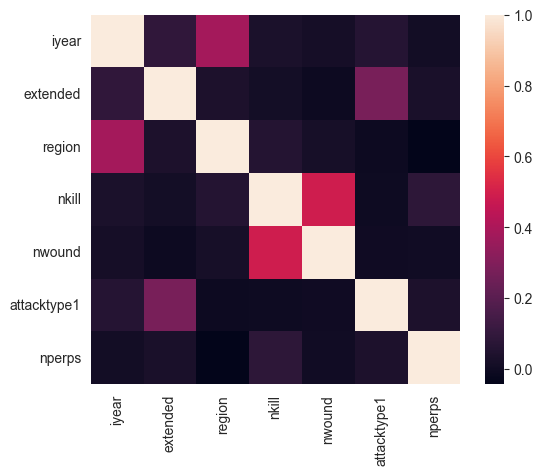

In [20]:
corr = df_without_onehot.corr()
sns.heatmap(corr, cbar=True, square=True)

The most correlating params

In [21]:
corrs = [(corr.iloc[row,col], row, col) for row in range(1, 6) for col in range(row)]
max = sorted(corrs, key=lambda x: abs(x[0]), reverse=True)[:10]
for m in max:
    print("Correlation: " + str(m[0]))
    print(corr.iloc[[m[1], m[2]]][[]])
    print("")

Correlation: 0.4869194892244996
Empty DataFrame
Columns: []
Index: [nwound, nkill]

Correlation: 0.3838107977907931
Empty DataFrame
Columns: []
Index: [region, iyear]

Correlation: 0.27565031364375386
Empty DataFrame
Columns: []
Index: [attacktype1, extended]

Correlation: 0.0906544561301147
Empty DataFrame
Columns: []
Index: [extended, iyear]

Correlation: 0.06016411751313973
Empty DataFrame
Columns: []
Index: [attacktype1, iyear]

Correlation: 0.058366006015169995
Empty DataFrame
Columns: []
Index: [nkill, region]

Correlation: 0.03656211186959015
Empty DataFrame
Columns: []
Index: [region, extended]

Correlation: 0.032707522916070944
Empty DataFrame
Columns: []
Index: [nkill, iyear]

Correlation: 0.018689333535153698
Empty DataFrame
Columns: []
Index: [nwound, region]

Correlation: 0.01710151079962815
Empty DataFrame
Columns: []
Index: [nwound, iyear]


Exporting CSV for Lab02

In [22]:
df.to_csv(r'D:\Programming\Python\MLLab01\global_preprocessed.csv', index= False )